# Análisis de Ventas de Supermercado

## Objetivos
 - Explorar el comportamiento de las ventas por sucursal, línea de producto, tipo de cliente, género y método de pago.
 - Analizar patrones por fecha.

## 1. Importación de las librerías

In [1]:
# Librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
plt.style.use('ggplot')
sns.set()

## 2. Carga de Datos

In [3]:
df=pd.read_csv('SupermarketSales.csv')
df.head()

,Date,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating
0,1/1/2024,Brooklyn,Member,Female,Food & Beverages,84.63,10,Credit card,9.0
1,1/1/2024,Queens,Normal,Female,Electronics,63.22,2,Cash,8.5
2,1/1/2024,Brooklyn,Normal,Female,Electronics,74.71,6,Cash,6.7
3,1/1/2024,Queens,Member,Female,Sports & Travel,36.98,10,Credit card,7.0
4,1/1/2024,Manhattan,Member,Female,Sports & Travel,27.04,4,Ewallet,6.9


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5053 non-null   object 
 1   Branch         5053 non-null   object 
 2   Customer type  5053 non-null   object 
 3   Gender         5053 non-null   object 
 4   Product line   5053 non-null   object 
 5   Unit price     5053 non-null   float64
 6   Quantity       5053 non-null   int64  
 7   Payment        5053 non-null   object 
 8   Rating         5053 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 355.4+ KB


,Unit price,Quantity,Rating
count,5053.000000,5053.000000,5053.000000
mean,39.692988,4.593509,6.884029
std,29.557474,2.787934,1.710245
min,2.010000,1.000000,3.000000
25%,11.630000,2.000000,5.600000
50%,33.900000,4.000000,7.100000
75%,64.940000,7.000000,8.200000
max,99.960000,10.000000,10.000000


En primera instancia, parece no haber valores nulos.

A continuación la revisión.

## 3. Exploración inicial

In [5]:
print(df.columns)
print()
print(df.isna().sum())
print()
print(df.duplicated().sum())

Index(['Date', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment', 'Rating'],
      dtype='object')

Date             0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Payment          0
Rating           0
dtype: int64

0


### 3.1 Observaciones iniciales

 - No hay valores nulos en el dataset
 - El dataset consta de 5053 filas y 9 columnas
 - Los nombres de las columnas están en escritura normal, para evitar errores, se recomienda convertir los nombres a snake_case

## 4. Limpieza y creación de variables
### 4.1 Corrección de los nombres de las columnas

In [6]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5053 non-null   object 
 1   branch         5053 non-null   object 
 2   customer_type  5053 non-null   object 
 3   gender         5053 non-null   object 
 4   product_line   5053 non-null   object 
 5   unit_price     5053 non-null   float64
 6   quantity       5053 non-null   int64  
 7   payment        5053 non-null   object 
 8   rating         5053 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 355.4+ KB


### 4.2 Creación de la columna 'total'

In [7]:
df['total'] = df['unit_price']*df['quantity']
df.info

<bound method DataFrame.info of             date     branch customer_type  gender      product_line  \
0       1/1/2024   Brooklyn        Member  Female  Food & Beverages   
1       1/1/2024     Queens        Normal  Female       Electronics   
2       1/1/2024   Brooklyn        Normal  Female       Electronics   
3       1/1/2024     Queens        Member  Female   Sports & Travel   
4       1/1/2024  Manhattan        Member  Female   Sports & Travel   
...          ...        ...           ...     ...               ...   
5048  12/31/2024  Manhattan        Normal  Female  Food & Beverages   
5049  12/31/2024   Brooklyn        Normal    Male  Food & Beverages   
5050  12/31/2024     Queens        Member    Male       Electronics   
5051  12/31/2024  Manhattan        Member  Female   Sports & Travel   
5052  12/31/2024     Queens        Normal  Female   Health & Beauty   

      unit_price  quantity      payment  rating   total  
0          84.63        10  Credit card     9.0  846.30  

### 4.3 Conversión de tipo para Fecha y hora

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5053 non-null   datetime64[ns]
 1   branch         5053 non-null   object        
 2   customer_type  5053 non-null   object        
 3   gender         5053 non-null   object        
 4   product_line   5053 non-null   object        
 5   unit_price     5053 non-null   float64       
 6   quantity       5053 non-null   int64         
 7   payment        5053 non-null   object        
 8   rating         5053 non-null   float64       
 9   total          5053 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 394.9+ KB
        date     branch customer_type  gender      product_line  unit_price  \
0 2024-01-01   Brooklyn        Member  Female  Food & Beverages       84.63   
1 2024-01-01     Queens        Normal  F

### 4.4 Creación de algunas columnas que pueden ser útiles posteriormente

Se crean columnas que servirán para un análisis posterior

In [9]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
df.info
print()
df.sample(10)

,date,branch,customer_type,gender,product_line,unit_price,quantity,payment,rating,total,day,month,day_of_week
3049,2024-08-30,Queens,Normal,Male,Electronics,94.77,1,Ewallet,7.6,94.77,30,8,Friday
3255,2024-09-13,Manhattan,Normal,Female,Electronics,84.47,2,Credit card,7.1,168.94,13,9,Friday
824,2024-03-13,Queens,Member,Male,Home & Lifestyle,63.91,8,Credit card,4.6,511.28,13,3,Wednesday
258,2024-01-25,Brooklyn,Normal,Male,Health & Beauty,96.11,1,Ewallet,7.8,96.11,25,1,Thursday
1741,2024-05-21,Brooklyn,Normal,Female,Food & Beverages,73.05,3,Cash,6.7,219.15,21,5,Tuesday
2026,2024-06-09,Queens,Member,Male,Food & Beverages,2.89,3,Ewallet,9.6,8.67,9,6,Sunday
1667,2024-05-15,Queens,Normal,Male,Electronics,50.23,1,Ewallet,6.1,50.23,15,5,Wednesday
452,2024-02-08,Brooklyn,Normal,Male,Home & Lifestyle,31.75,4,Cash,8.6,127.00,8,2,Thursday
1351,2024-04-21,Queens,Normal,Female,Health & Beauty,58.32,2,Ewallet,6.0,116.64,21,4,Sunday
3665,2024-10-12,Manhattan,Normal,Female,Food & Beverages,14.87,9,Ewallet,6.8,133.83,12,10,Saturday


## 5. Análisis exploratorio

### 5.1 Ventas por sucursal

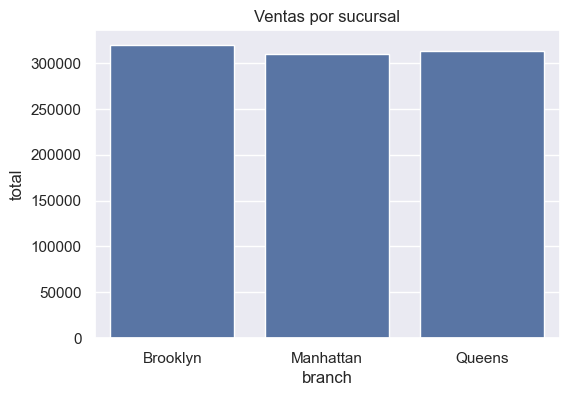

In [10]:
sales_branch = df.groupby('branch')['total'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=sales_branch, x='branch', y='total')
plt.title('Ventas por sucursal')
plt.show()

#### Observaciones
 - Las tres sucursales (Brooklyn, Manhattan y Queens) presentan niveles de venta muy similares, sin diferencias grandes entre ellas.
 - Brooklyn tiene una ligera ventaja en ventas totales, mientras que Manhattan es la que queda ligeramente por debajo, pero por un margen pequeño. 
 - Esto sugiere que la distribución de clientes y demanda es bastante equilibrada entre las sucursales.
 

### 5.2 Ventas por línea de producto

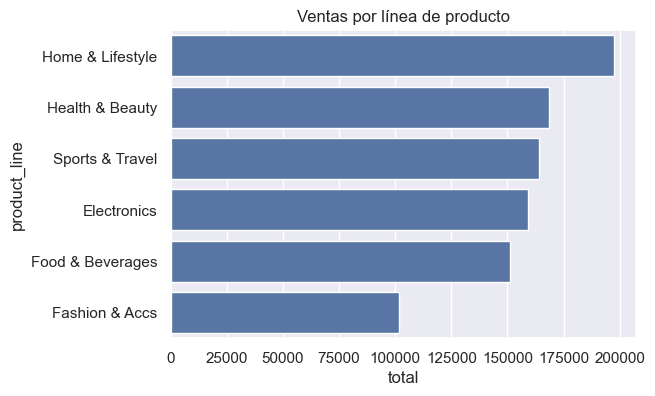

In [11]:
sales_product = df.groupby('product_line')['total'].sum().reset_index().sort_values('total', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=sales_product, x='total', y='product_line')
plt.title('Ventas por línea de producto')
plt.show()

#### Observaciones
 - Home & Lifestyle es la categoría más fuerte, liderando por un amplio margen. 
 - Le siguen Health & Beauty, Sports & Travel, Electronics y Food & Beverages, todas con niveles de venta relativamente similares.
 - Fashion & Accessories es la categoría con menor facturación.
 - Es posible que Home & Lifestyle tenga productos de mayor precio, mayor volumen de venta o ambos.

### 5.3 Método de pago más utilizado

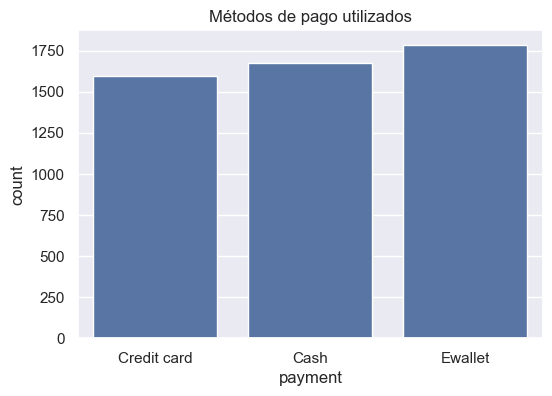

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='payment')
plt.title('Métodos de pago utilizados')
plt.show()

#### Observaciones
 - Los tres métodos (Credit Card, Cash y Ewallet) están muy balanceados, Ewallet es el más utilizado.
 - Esto puede sugerir que los clientes tienen preferencia por métodos digitales y rápidos.

### 5.4 Gasto por tipo de cliente y género

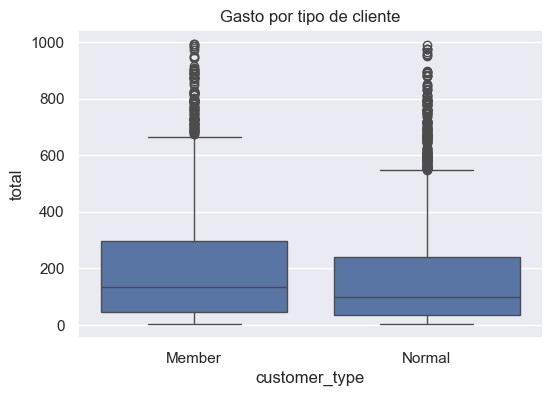

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='customer_type', y='total')
plt.title('Gasto por tipo de cliente')
plt.show()

#### Observaciones
 - La distribución del gasto es muy similar entre clientes Member y Normal.
 - Los miembros tienden a tener una mediana ligeramente superior, lo que indica que en promedio gastan un poco más.
 - Sin embargo, la presencia de muchos outliers en ambos grupos sugiere que el ticket alto no está fuertemente ligado al tipo de cliente.

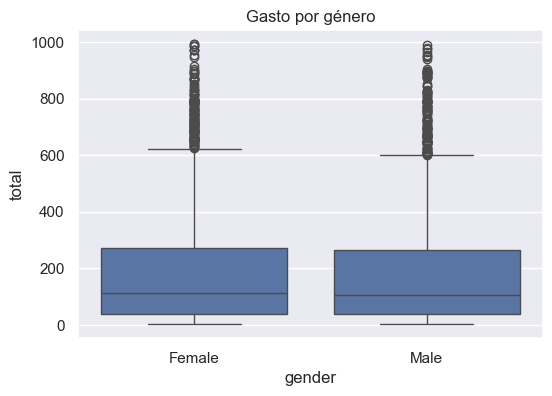

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='gender', y='total')
plt.title('Gasto por género')
plt.show()

#### Observaciones
 - No existe una diferencia significativa entre hombres y mujeres en cuanto al gasto total.
 - Las medianas y la dispersión de los boxplots son casi idénticas.
 - Esto sugiere que, para este supermercado, el género no es un factor relevante para explicar el monto de compra.

### 5.5 Ventas por día de la semana

C:\Users\fabri\AppData\Local\Temp\ipykernel_31360\1224512173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_day = df.groupby('day_of_week')['total'].sum().reset_index()


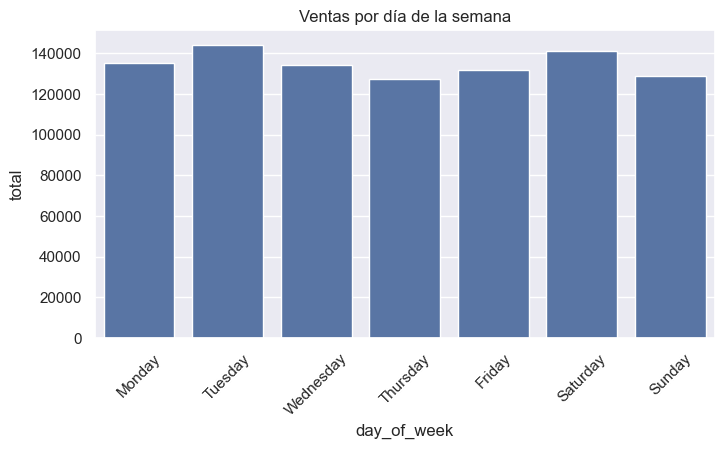

In [15]:
sales_day = df.groupby('day_of_week')['total'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=sales_day, x='day_of_week', y='total')
plt.title('Ventas por día de la semana')
plt.xticks(rotation=45)
plt.show()

#### Observaciones
 - Los días con mayores ventas son Martes y Sábado, mostrando picos claros. 
 - El día con menor venta es Jueves.
 - En general, no hay una caída fuerte entre días; las ventas son relativamente constantes, lo que indica un flujo estable de clientes a lo largo de la semana.
 - Esto puede ayudar a crear promociones específicas.

### 5.6 Relación Rating vs Total

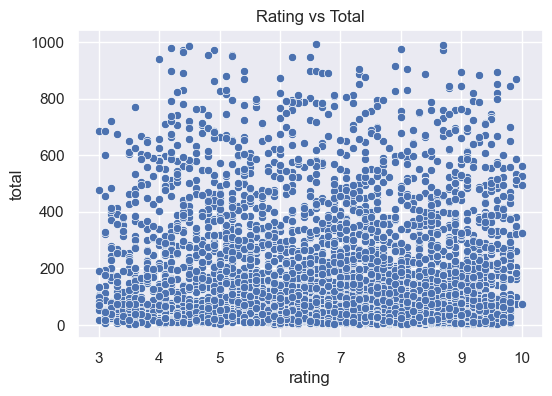

,rating,total
rating,1.000000,-0.054107
total,-0.054107,1.000000


In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='rating', y='total')
plt.title('Rating vs Total')
plt.show()

df[['rating','total']].corr()

#### Observaciones
 - No se observa una relación clara entre la calificación que deja el cliente y el monto de compra.
 - La correlación es prácticamente nula, como se ve por la dispersión uniforme.

### 5.8 Ventas por día por sucursal

C:\Users\fabri\AppData\Local\Temp\ipykernel_31360\473924194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_day_branch = df.groupby(['day_of_week', 'branch'])['total'].sum().reset_index()


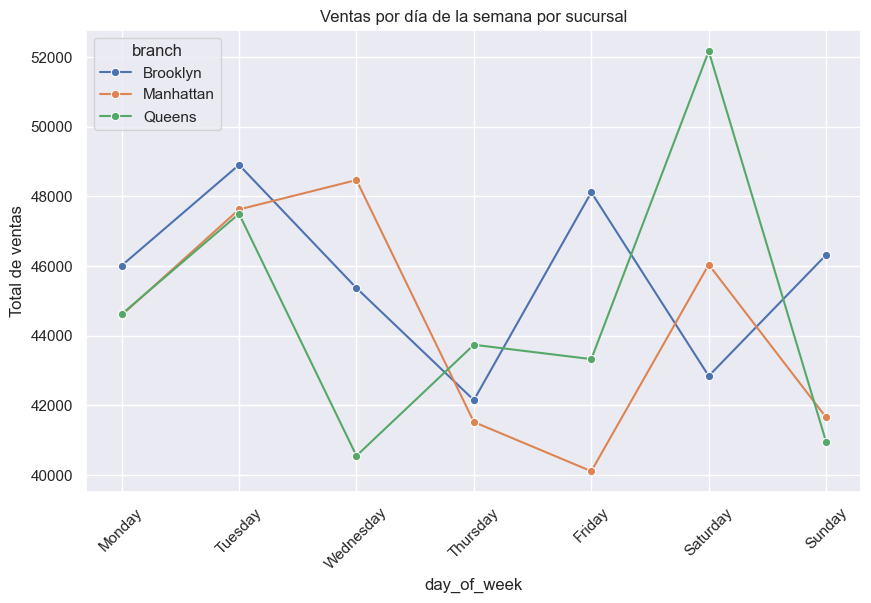

In [17]:
sales_day_branch = df.groupby(['day_of_week', 'branch'])['total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=sales_day_branch,
    x='day_of_week',
    y='total',
    hue='branch',
    marker='o'
)
plt.title('Ventas por día de la semana por sucursal')
plt.xticks(rotation=45)
plt.ylabel('Total de ventas')
plt.show()

#### Observaciones
 - Las tres sucursales muestran un patrón similar: picos de venta a mitad de semana (martes-miércoles) y los sábados.
 - El día más fuerte para Queens es claramente sábado, donde supera los $52,000, siendo el valor más alto entre todas las combinaciones.
 - Manhattan muestra su punto más débil el viernes, lo que podría indicar menor tráfico justo antes del fin de semana.
 - Brooklyn es la sucursal más estable, con fluctuaciones menos marcadas entre días.
 - No hay un “día muerto” universal; sin embargo, domingo parece ser el más débil para Queens y Manhattan.

 Conclusión clave:
 
Las sucursales tienen picos y valles distintos, lo que sugiere que la demanda depende del comportamiento de clientes locales. Queens es especialmente fuerte los sábados.

### 5.9 Ventas por línea de producto por sucursal

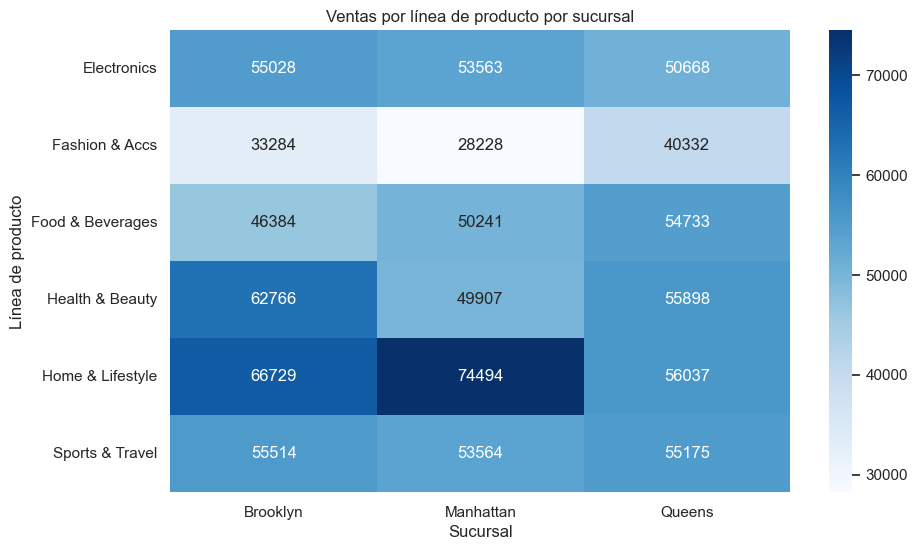

In [18]:
sales_product_branch = df.groupby(['product_line', 'branch'])['total'].sum().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(sales_product_branch, annot=True, fmt='.0f', cmap='Blues')
plt.title('Ventas por línea de producto por sucursal')
plt.ylabel('Línea de producto')
plt.xlabel('Sucursal')
plt.show()

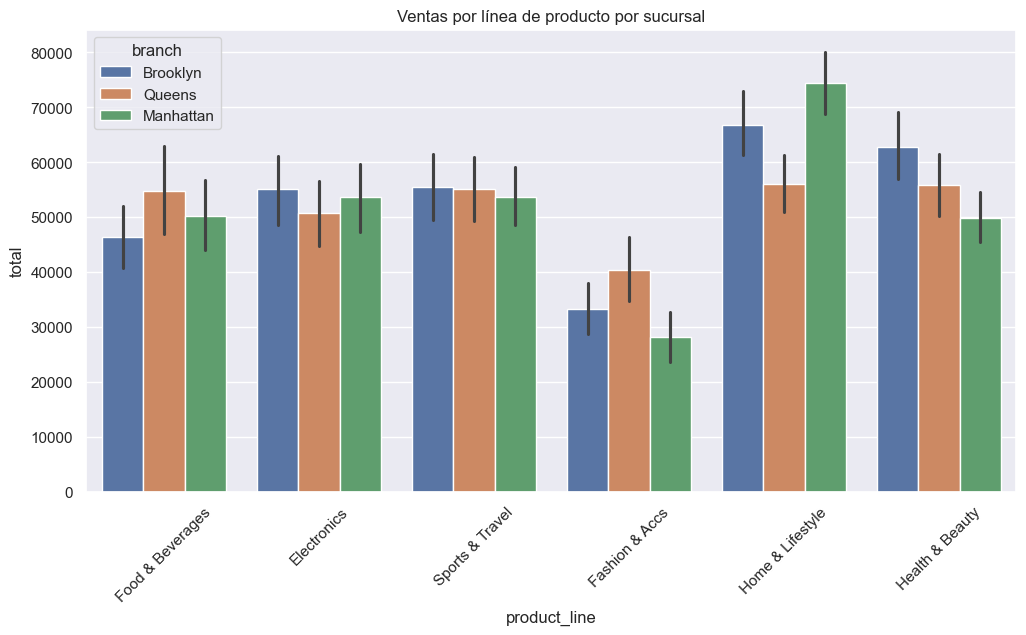

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='product_line',
    y='total',
    hue='branch',
    estimator=sum
)
plt.title('Ventas por línea de producto por sucursal')
plt.xticks(rotation=45)
plt.show()

#### Observaciones
 - La línea Home & Lifestyle domina en todas las sucursales, pero destaca con diferencia en Manhattan (≈ 74,500).
 - Health & Beauty es también fuerte en todas las sucursales, especialmente en Brooklyn.
 - Queens tiene su mejor desempeño relativo en Food & Beverages y Sports & Travel.
 - Fashion & Accessories es la categoría más débil en Brooklyn y Manhattan, pero es notablemente más fuerte en Queens.

 Conclusión clave:

Cada sucursal tiene “especialidades” distintas. Manhattan destaca en productos premium (Home & Lifestyle), mientras Queens empuja más categorías de consumo cotidiano (Food & Beverages y Fashion & Accs).

### 5.10 Gasto total por género y por tipo de cliente por cada sucursal

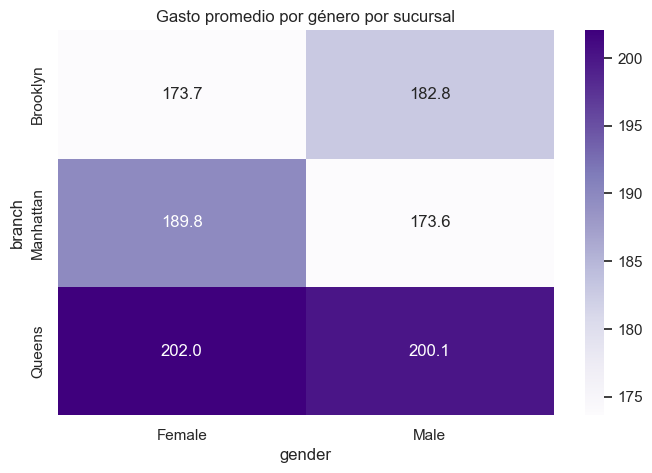

In [20]:
gender_branch = df.groupby(['branch','gender'])['total'].mean().unstack()

plt.figure(figsize=(8,5))
sns.heatmap(gender_branch, annot=True, fmt='.1f', cmap='Purples')
plt.title('Gasto promedio por género por sucursal')
plt.show()

#### Observaciones
 - En Brooklyn, los hombres gastan más ($182.8 vs $173.7).
 - En Manhattan, las mujeres gastan más ($189.8 vs $173.6).
 - En Queens, el gasto es prácticamente idéntico entre géneros (ambos alrededor de $200).
 - Los clientes de Queens son los que más gastan promedio, independientemente del género.

Conclusión clave:

Las diferencias de gasto por género no son universales; dependen de la sucursal. Queens es la sucursal con consumidores más “gastadores” sin importar el género.

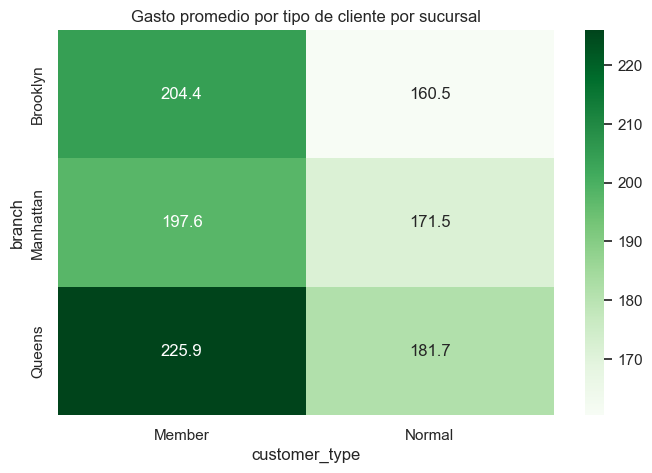

In [21]:
cust_branch = df.groupby(['branch','customer_type'])['total'].mean().unstack()

plt.figure(figsize=(8,5))
sns.heatmap(cust_branch, annot=True, fmt='.1f', cmap='Greens')
plt.title('Gasto promedio por tipo de cliente por sucursal')
plt.show()

#### Observaciones

 - En todas las sucursales, los clientes Member gastan más que los clientes Normal.
 - Queens presenta la mayor diferencia: Member: 225.9 vs Normal: 181.7
 - Brooklyn y Manhattan también muestran patrones consistentes: los miembros siempre gastan más de manera significativa.
 - Esto podría indicar que el programa de membresía está bien diseñado o que los clientes más fieles son los que consumen más.

Conclusión clave:

Ser “Member” sí está asociado a un ticket promedio más alto en todas las sucursales. Queens tiene a los miembros más valiosos.

### 5.11 Gasto promedio por día por sucursal

C:\Users\fabri\AppData\Local\Temp\ipykernel_31360\939003422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_day_branch_hm = df.groupby(['branch', 'day_of_week'])['total'].mean().unstack()


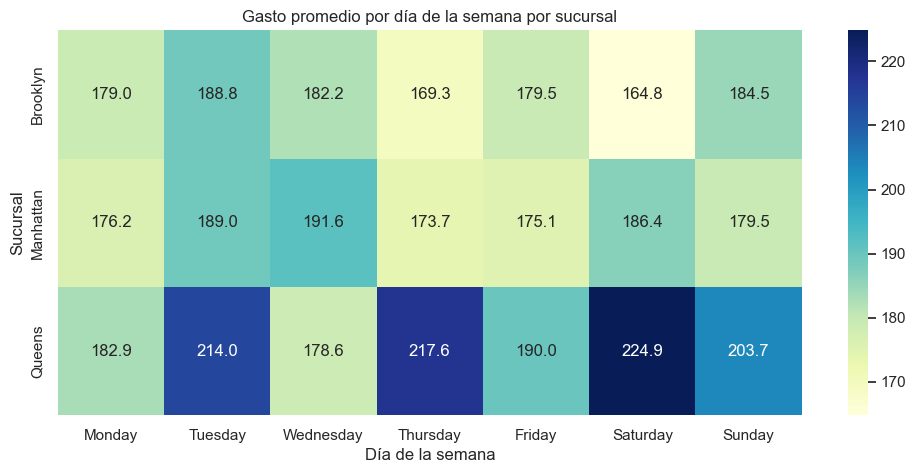

In [22]:
avg_day_branch_hm = df.groupby(['branch', 'day_of_week'])['total'].mean().unstack()

plt.figure(figsize=(12,5))
sns.heatmap(avg_day_branch_hm, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Gasto promedio por día de la semana por sucursal")
plt.ylabel("Sucursal")
plt.xlabel("Día de la semana")
plt.show()

#### Observaciones
 - El gasto promedio por cliente varía significativamente según la sucursal y el día de la semana.
 - Queens destaca como la sucursal con los tickets más altos, mientras que Brooklyn muestra los más bajos.
 - Manhattan se mantiene estable sin grandes fluctuaciones.
 - Además, los días fuertes y débiles difieren entre las sucursales, lo que confirma que cada tienda tiene un comportamiento de compra único.

## 6. Conclusiones

El análisis de ventas del supermercado revela diferencias importantes en el comportamiento de compra entre sucursales, líneas de producto y perfiles de cliente. Si bien el volumen total de ventas es similar entre Brooklyn, Manhattan y Queens, el valor promedio del ticket y la composición del consumo varían significativamente.

Queens destaca como la sucursal con los clientes de mayor gasto promedio, especialmente los días martes, jueves y sábado, y con picos en categorías como Food & Beverages, Health & Beauty y Fashion & Accessories. Por su parte, Manhattan muestra una estructura más equilibrada y consistente a lo largo de la semana, con foco en categorías de mayor valor como Home & Lifestyle. Brooklyn, en cambio, presenta tickets promedio más bajos y un comportamiento más estable, con menos variabilidad entre días.

En cuanto a los perfiles de cliente, los miembros del programa de lealtad (Member) registran sistemáticamente un gasto promedio mayor en todas las sucursales, lo cual valida la efectividad de dicho programa. No se identifican diferencias importantes en gasto por género, salvo ligeras variaciones por sucursal.

Finalmente, la relación entre Rating y Total es prácticamente nula, lo que indica que la satisfacción reportada por los clientes depende de factores distintos al monto gastado. Cada tienda presenta un “ritmo de compra” diferente, lo que sugiere que los patrones de consumo están fuertemente influenciados por la ubicación y el tipo de cliente local.

## 7. Recomendaciones

1. Potenciar categorías clave según la sucursal

 - Manhattan: incrementar el inventario y promociones de Home & Lifestyle y Health & Beauty, sus categorías más fuertes.
 - Queens: reforzar Fashion & Accessories y Food & Beverages, que tienen mayor tracción aquí que en otras tiendas.  
 - Brooklyn: revisar el mix de productos y explorar precios o bundles para elevar el ticket promedio.

2. Optimizar horarios y asignación de personal según patrones reales

 - Queens: aumentar personal y recursos los martes, jueves y sábados, días de mayor gasto promedio.
 - Manhattan: mantener personal constante por su comportamiento estable.
 - Brooklyn: monitorear picos en días específicos como martes, pero optimizar en fin de semana, cuando su rendimiento es más bajo.

3. Expandir y segmentar el programa de lealtad

 - Los clientes Member gastan consistentemente más en todas las sucursales.
 - Ofrecer incentivos de afiliación en Queens para potenciar aún más su alto valor.
 - Crear beneficios diferenciados por sucursal (por ejemplo, descuentos en categorías dominantes de cada tienda).

4. Diseñar promociones personalizadas por sucursal

 - Queens: campañas para días de alto gasto (martes, jueves y sábado).
 - Manhattan: promociones toda la semana, ya que no tiene días débiles.
 - Brooklyn: ofertas orientadas a elevar el ticket los fines de semana.

5. Oportunidad: Identificar productos complementarios por sucursal

 - Basado en las diferencias de comportamiento por línea de producto:
    - Bundle de Health & Beauty + Home & Lifestyle para Manhattan.
    - Bundle de Fashion & Accessories + Food & Beverages para Queens (comportamiento alineado).
    - En Brooklyn, promociones combinadas que aumenten el valor del ticket.

6. Implementar dashboards internos por sucursal para tomar decisiones más ágiles en operación y marketing:

 - Ventas por día
 - Ticket promedio por día
 - Variación por tipo de cliente
 - Rendimiento por línea de producto